## 라이브러리 로딩

In [91]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [92]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train.head() ## 파일이 잘 불러와졌는지 확인

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 간단한 EDA(탐색적 자료분석)

In [93]:
# training data info
train.info()
train.describe()
# 결측값 존재여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [94]:
# test data info
test.info()
test.describe()
#결측값 존재여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693
std,288.819436,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694
min,0.000000,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000
25%,249.750000,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000
50%,499.500000,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000
75%,749.250000,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000
max,999.000000,15.600000,1.240000,0.810000,22.60000,0.611000,122.500000,289.000000,1.003150,3.780000,1.310000,14.000000


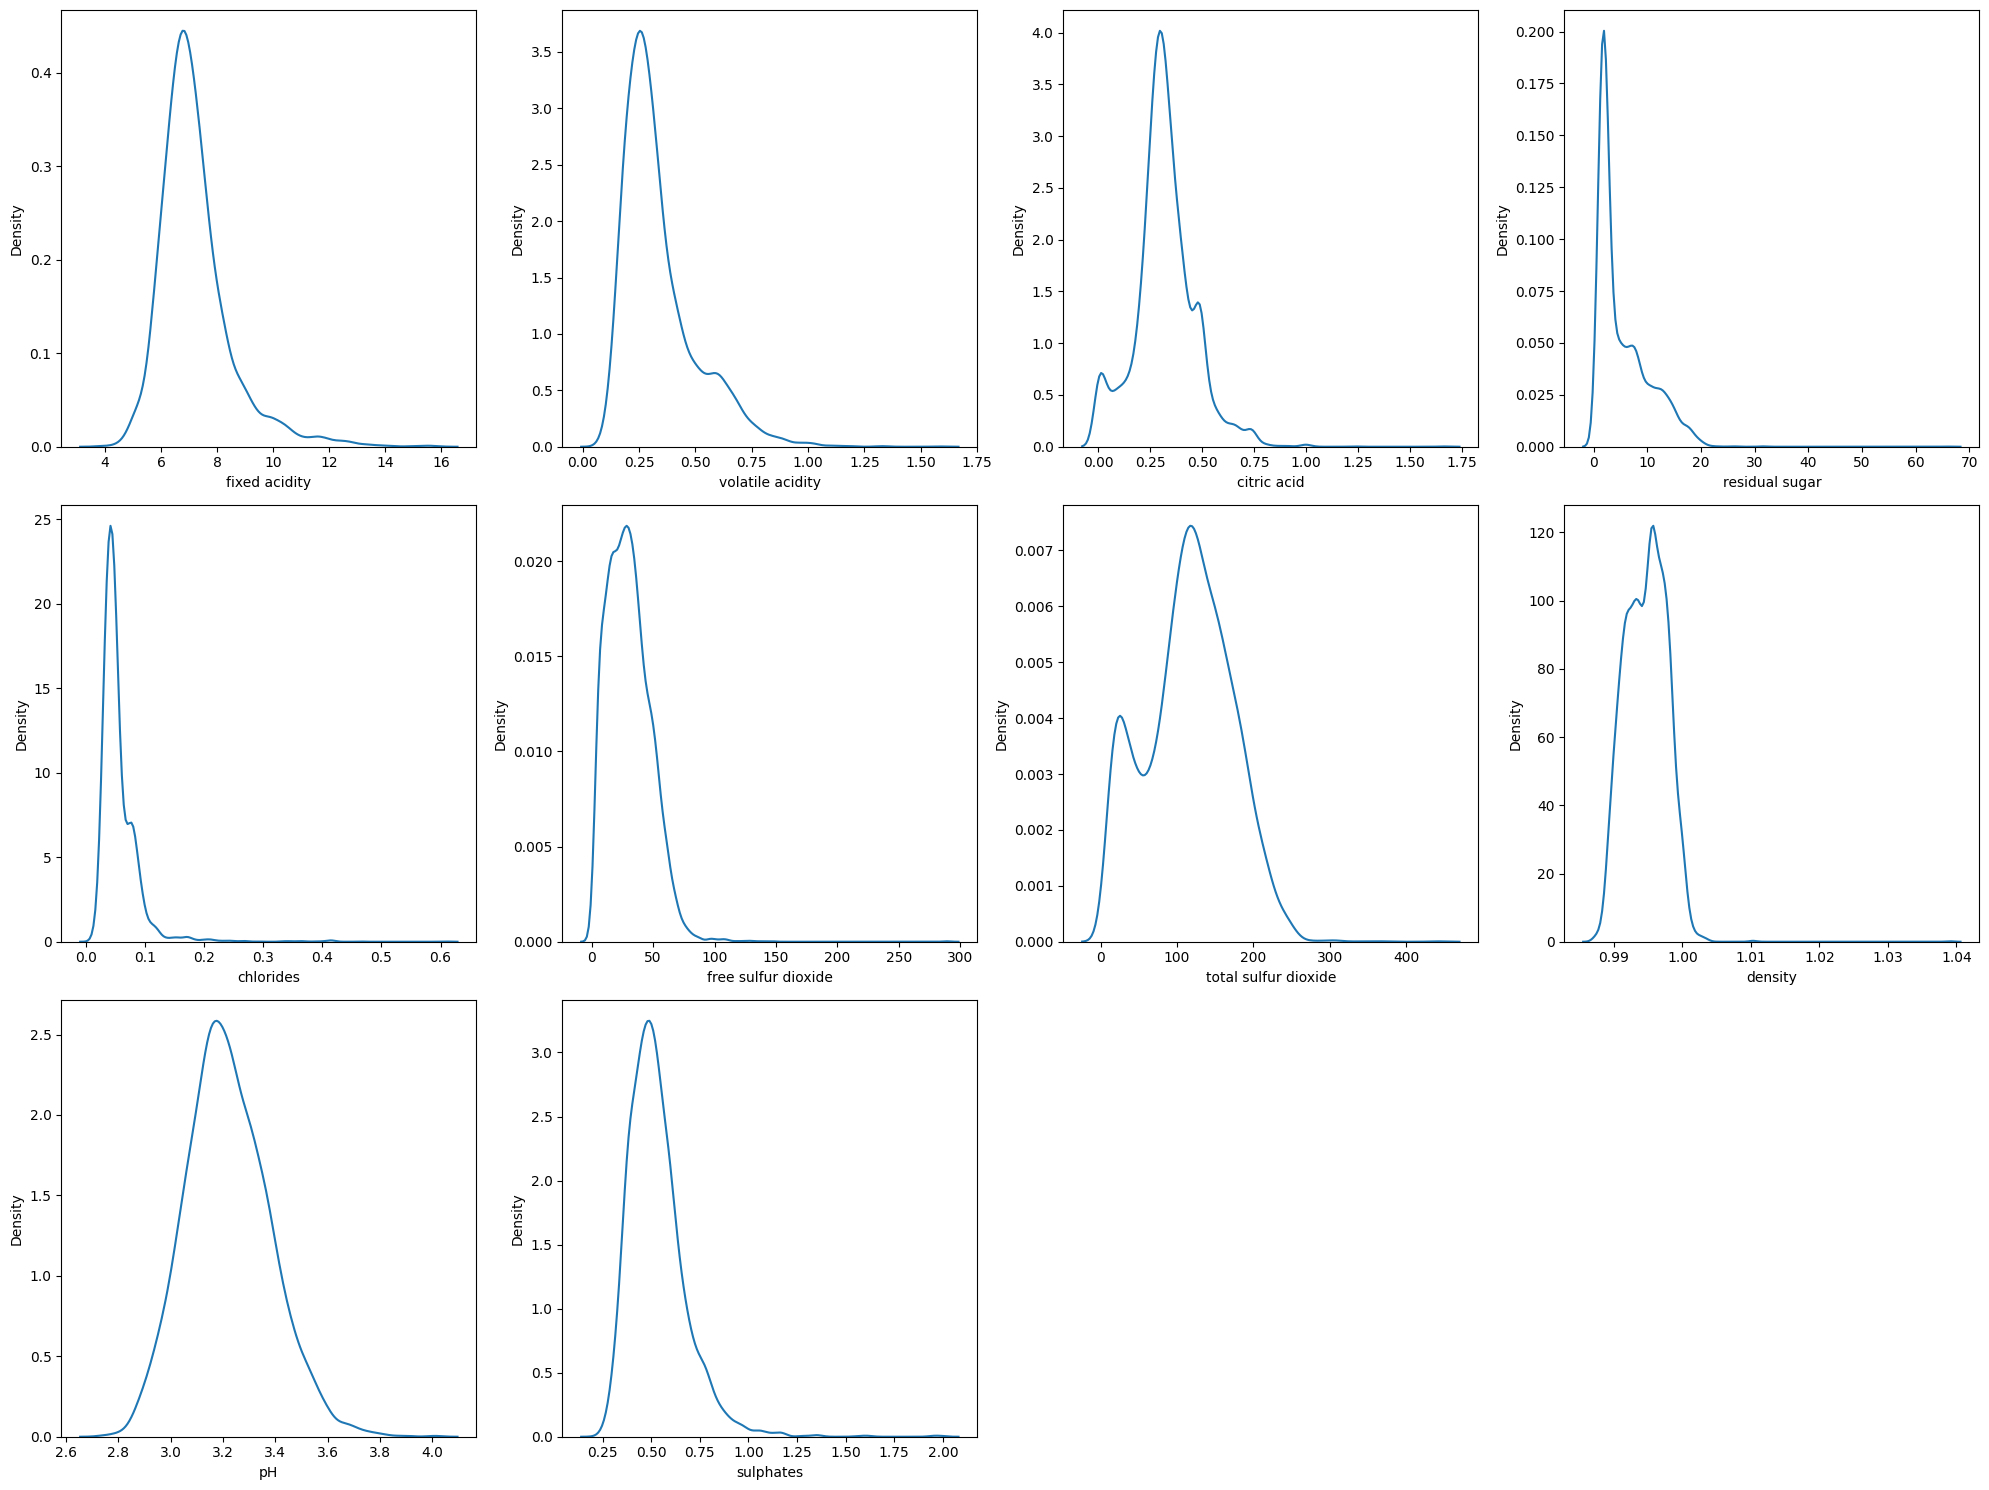

In [95]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# kde plot을 그려 분포를 확인하시오
for i in range(2,12):
   sns.kdeplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


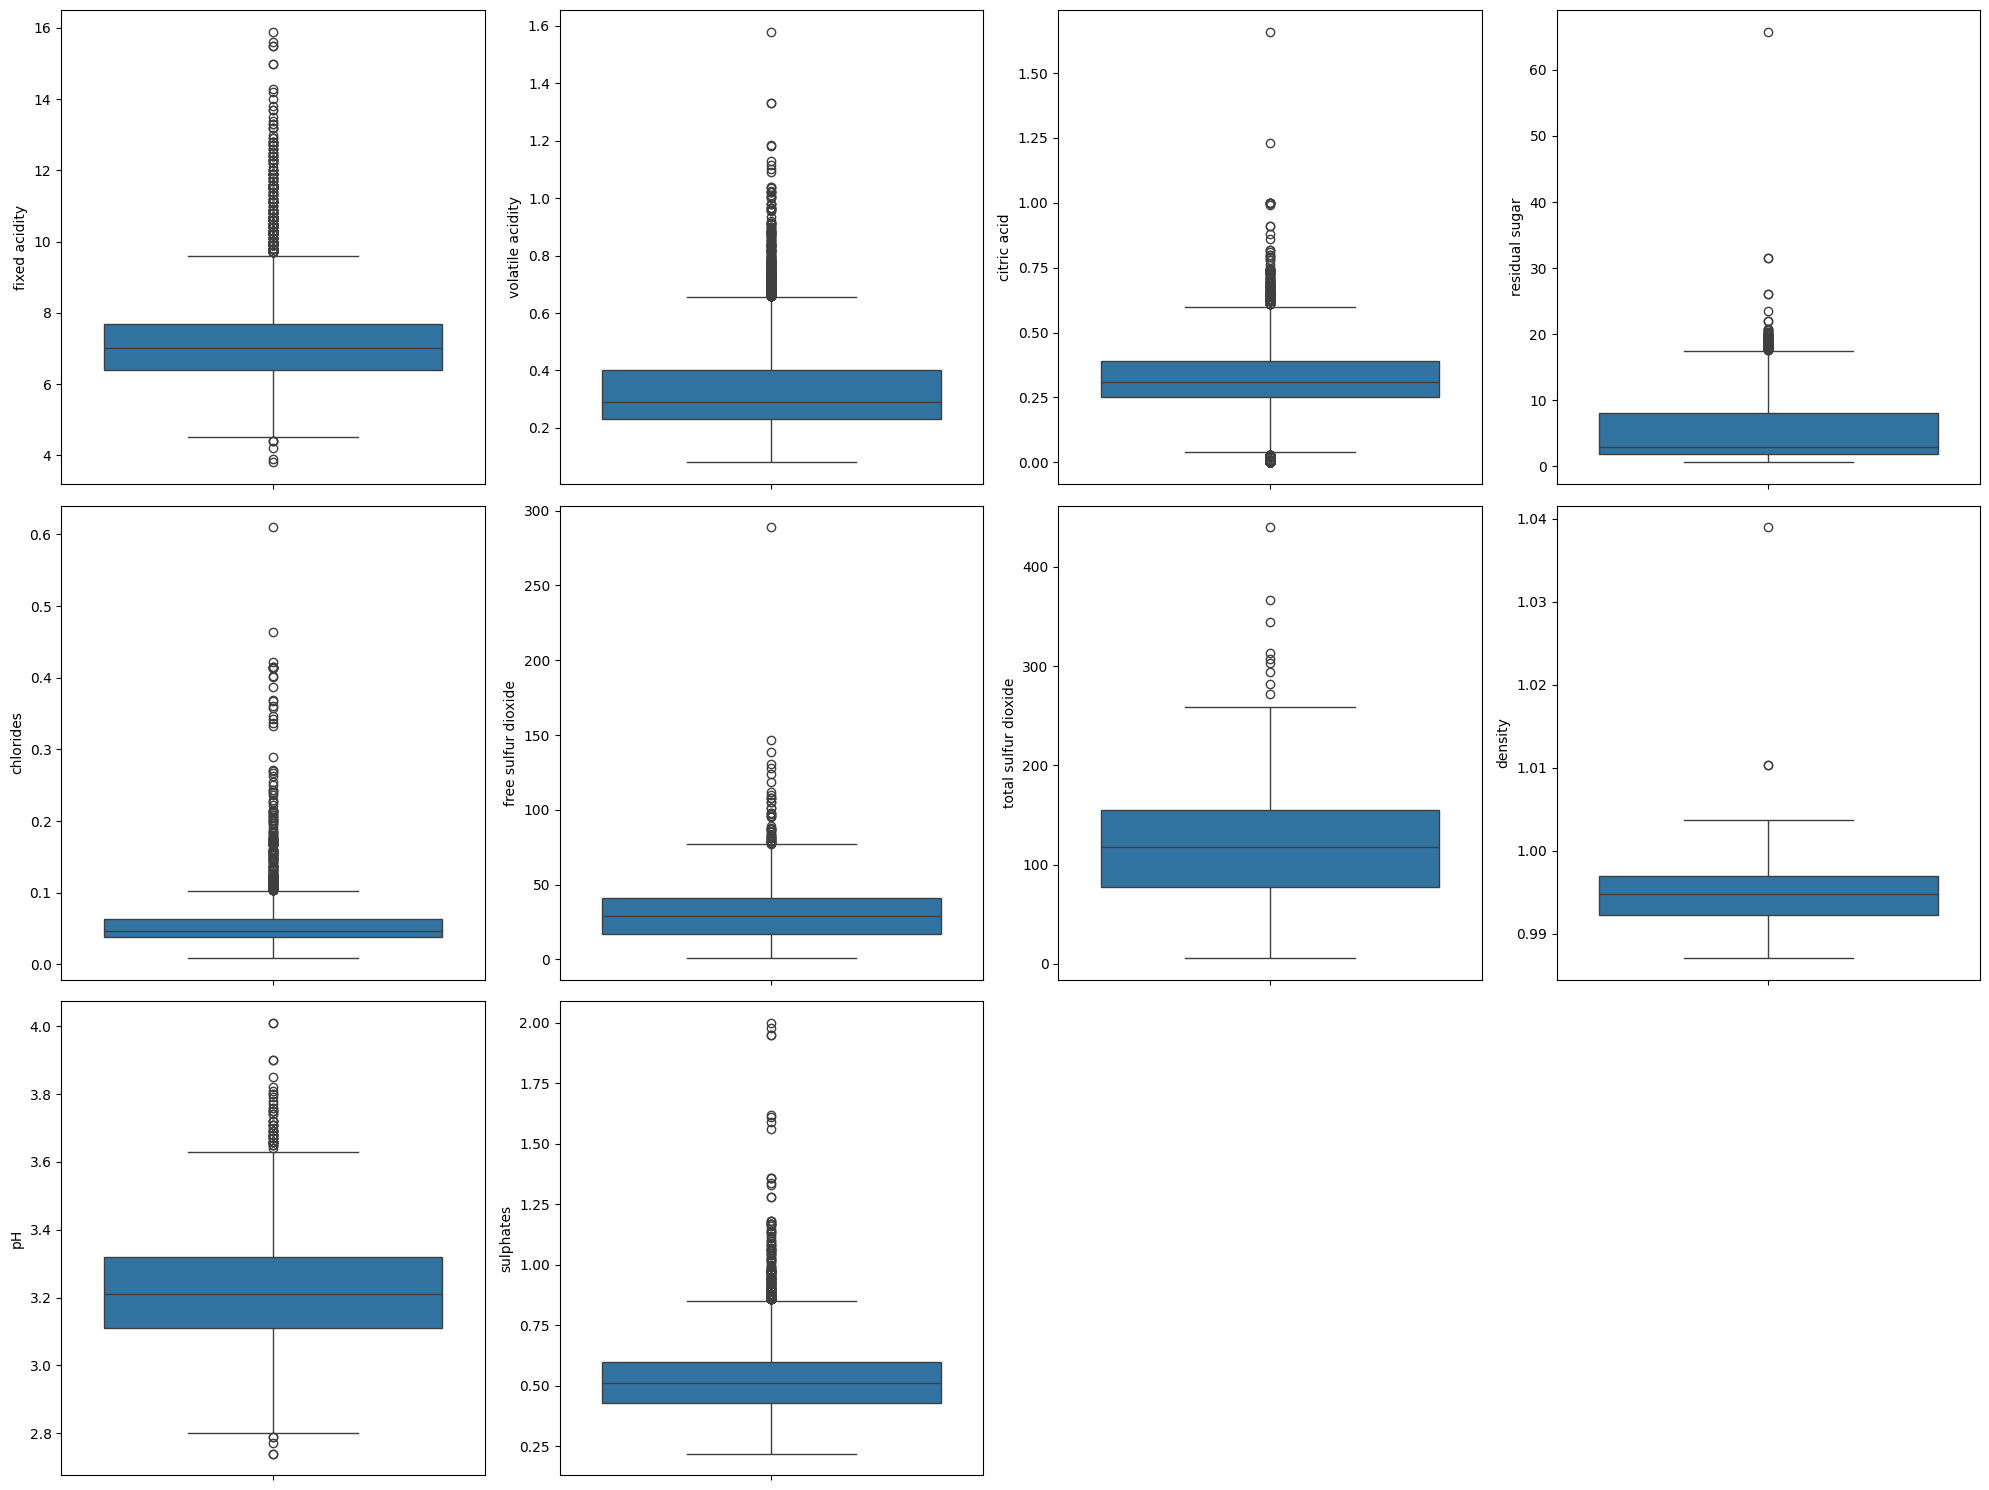

In [96]:
# boxplot을 그려 변수별 분포를 확인하시오

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i in range(2,12):
   sns.boxplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


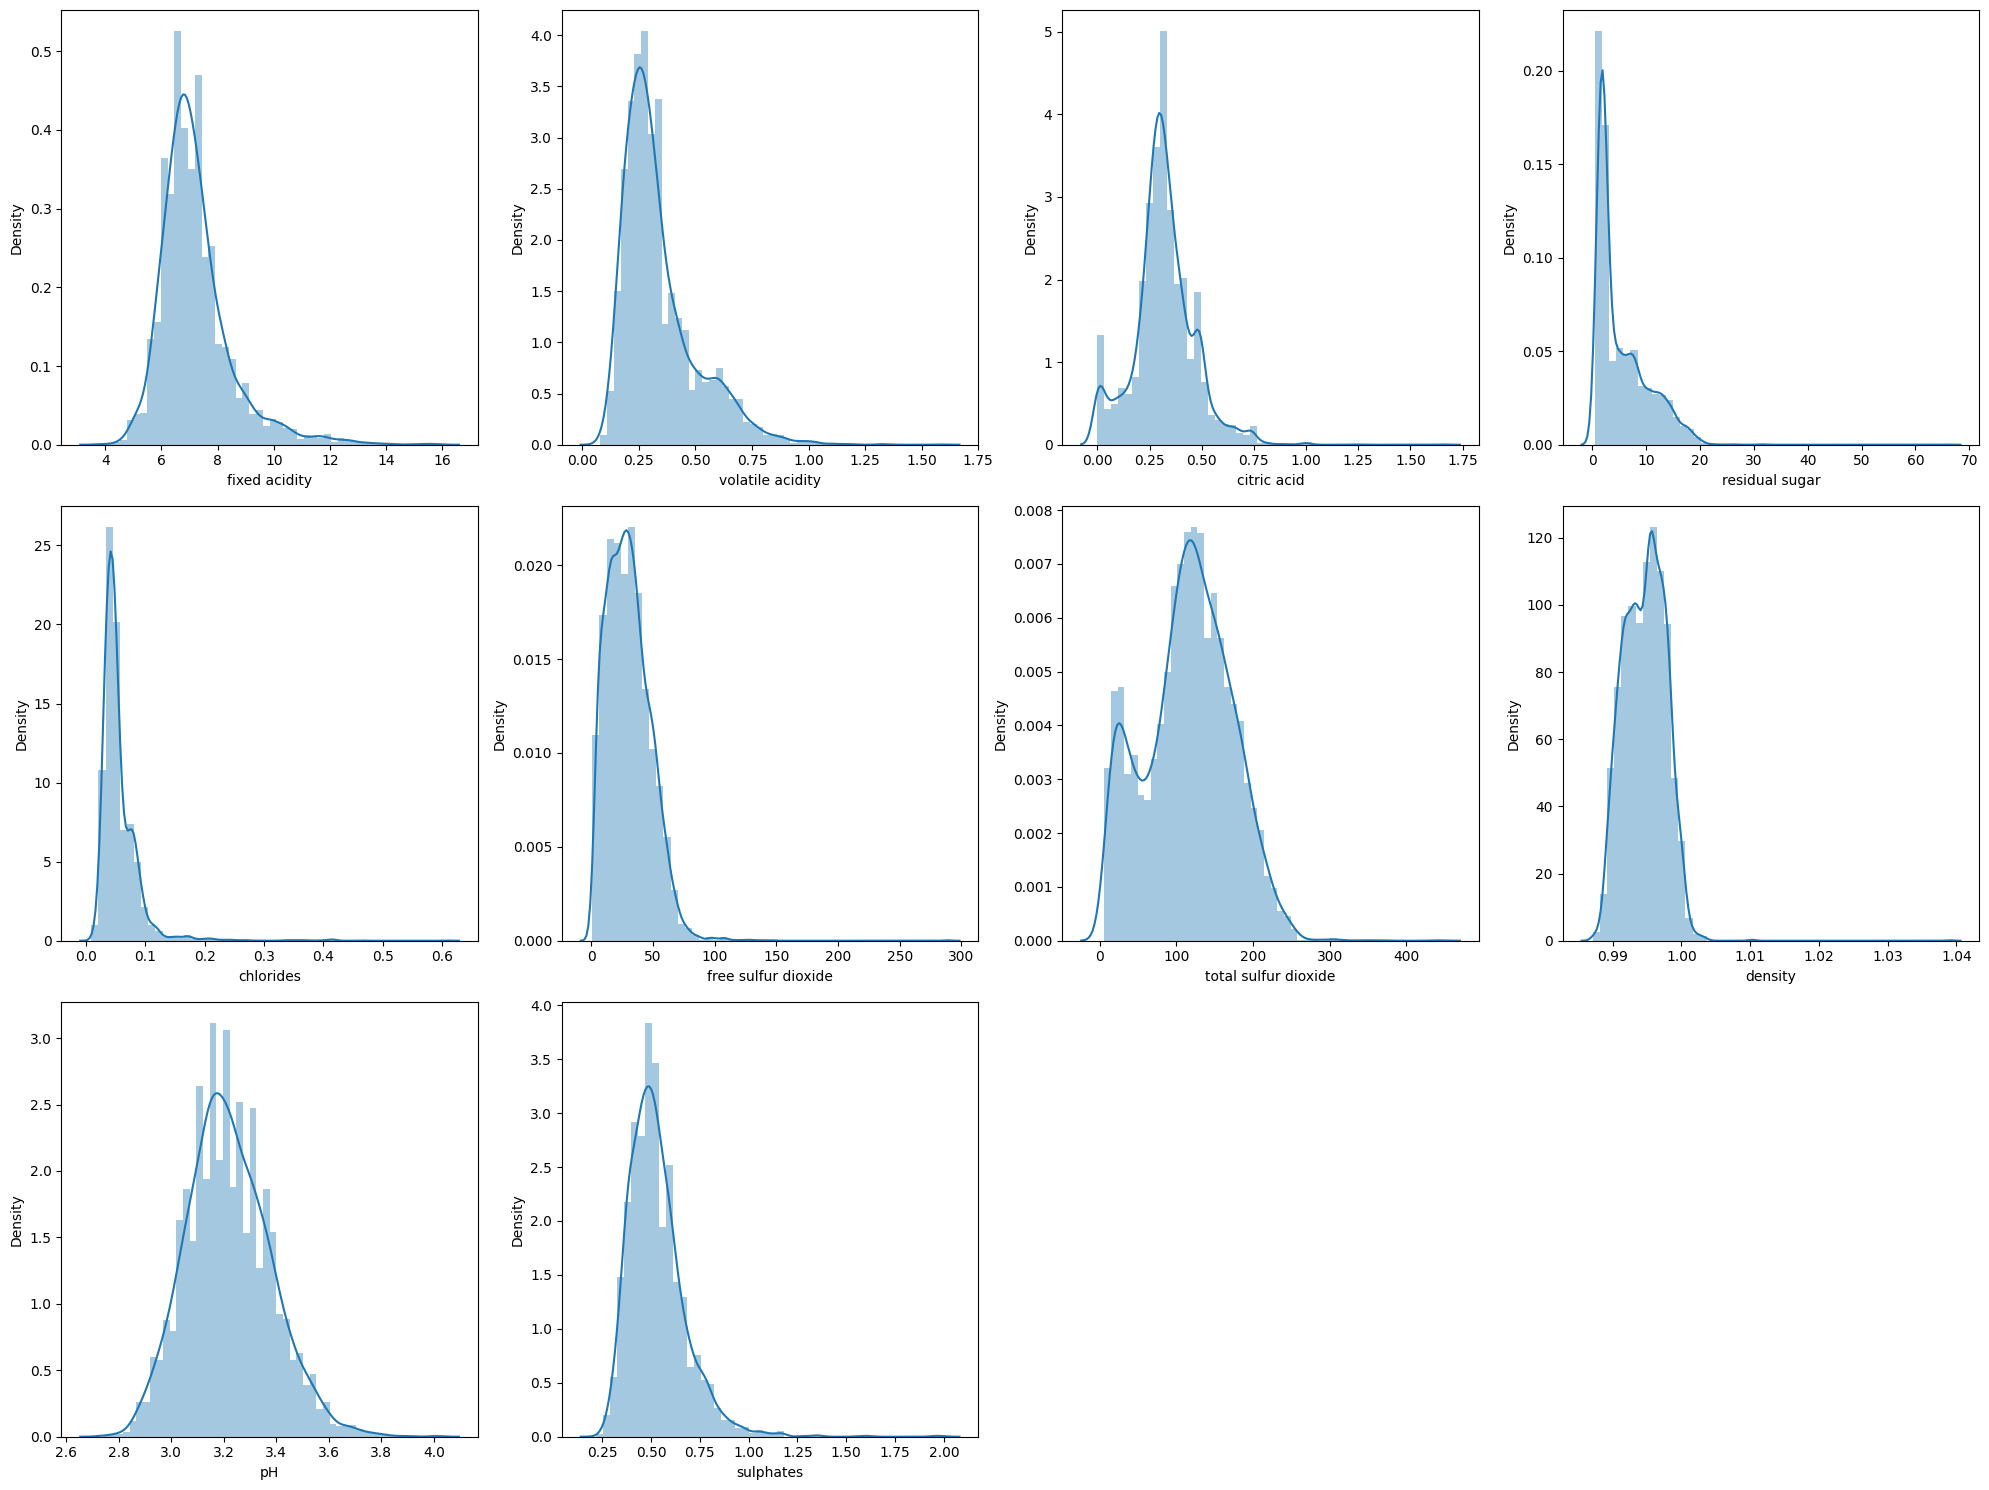

In [97]:
# distribution plot을 그려 변수별 분포를 확인하시오

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i in range(2,12):
   sns.distplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

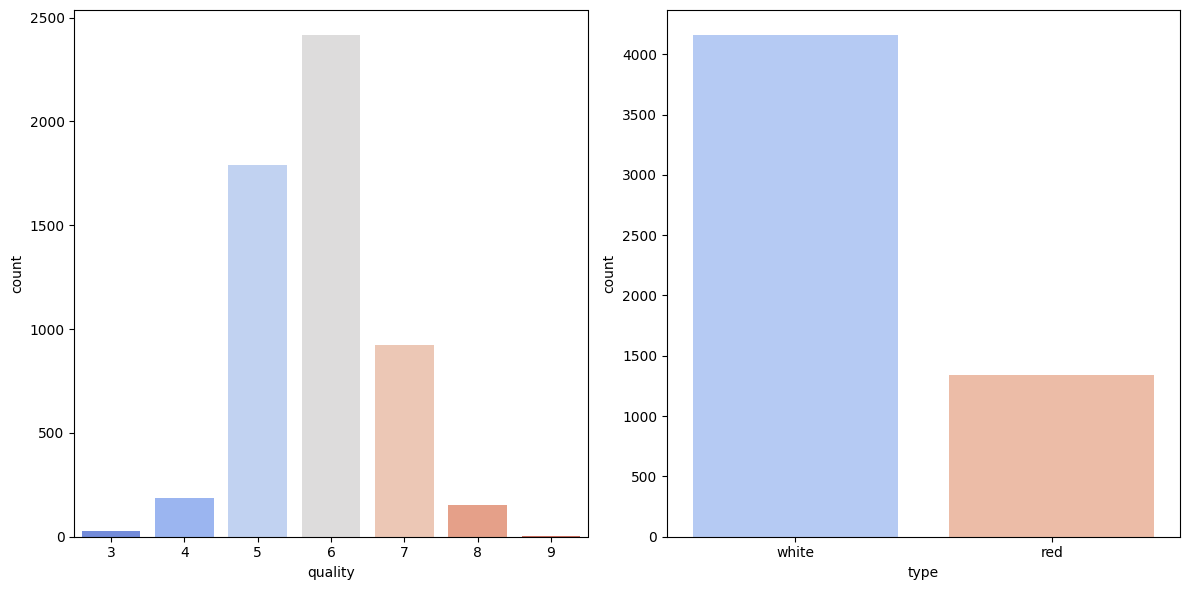

In [98]:
# barplots for categorical plots('quality', 'type') 범주형 변수 분포 확인하시오
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.countplot(data=train, x= 'quality', palette='coolwarm', ax=axes[0])
sns.countplot(data=train, x= 'type', palette='coolwarm', ax=axes[1])


plt.tight_layout()
plt.show()

## 데이터 전처리

In [100]:
# 코드를 완성해 데이터 중복값 확인하시오
train.duplicated().sum()

0

#### train.duplicated().sum() &rightarrow; 0 

> 중복값 없음

In [101]:
# 코드를 완성해 범주형 변수 인코딩하시오
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['type']=encoder.fit_transform(train['type'])

In [102]:
train['type'].value_counts()

type
1    4159
0    1338
Name: count, dtype: int64

In [103]:
# Test data 역시 인코딩
test['type']=encoder.fit_transform(test['type'])


In [104]:
test['type'].value_counts()

type
1    739
0    261
Name: count, dtype: int64

In [105]:
# EDA 결과를 바탕으로 이상치 처리를 위한 함수를 정의하시오
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # 이상치 경계값 계산
    line_down = Q1 - 1.5 * IQR
    line_up = Q3 + 1.5 * IQR

    df = df.clip(line_down, line_up)

    return df

for i in range(2,12):
    train.iloc[:,i] = outlier(train.iloc[:,i]) #이상치 제거

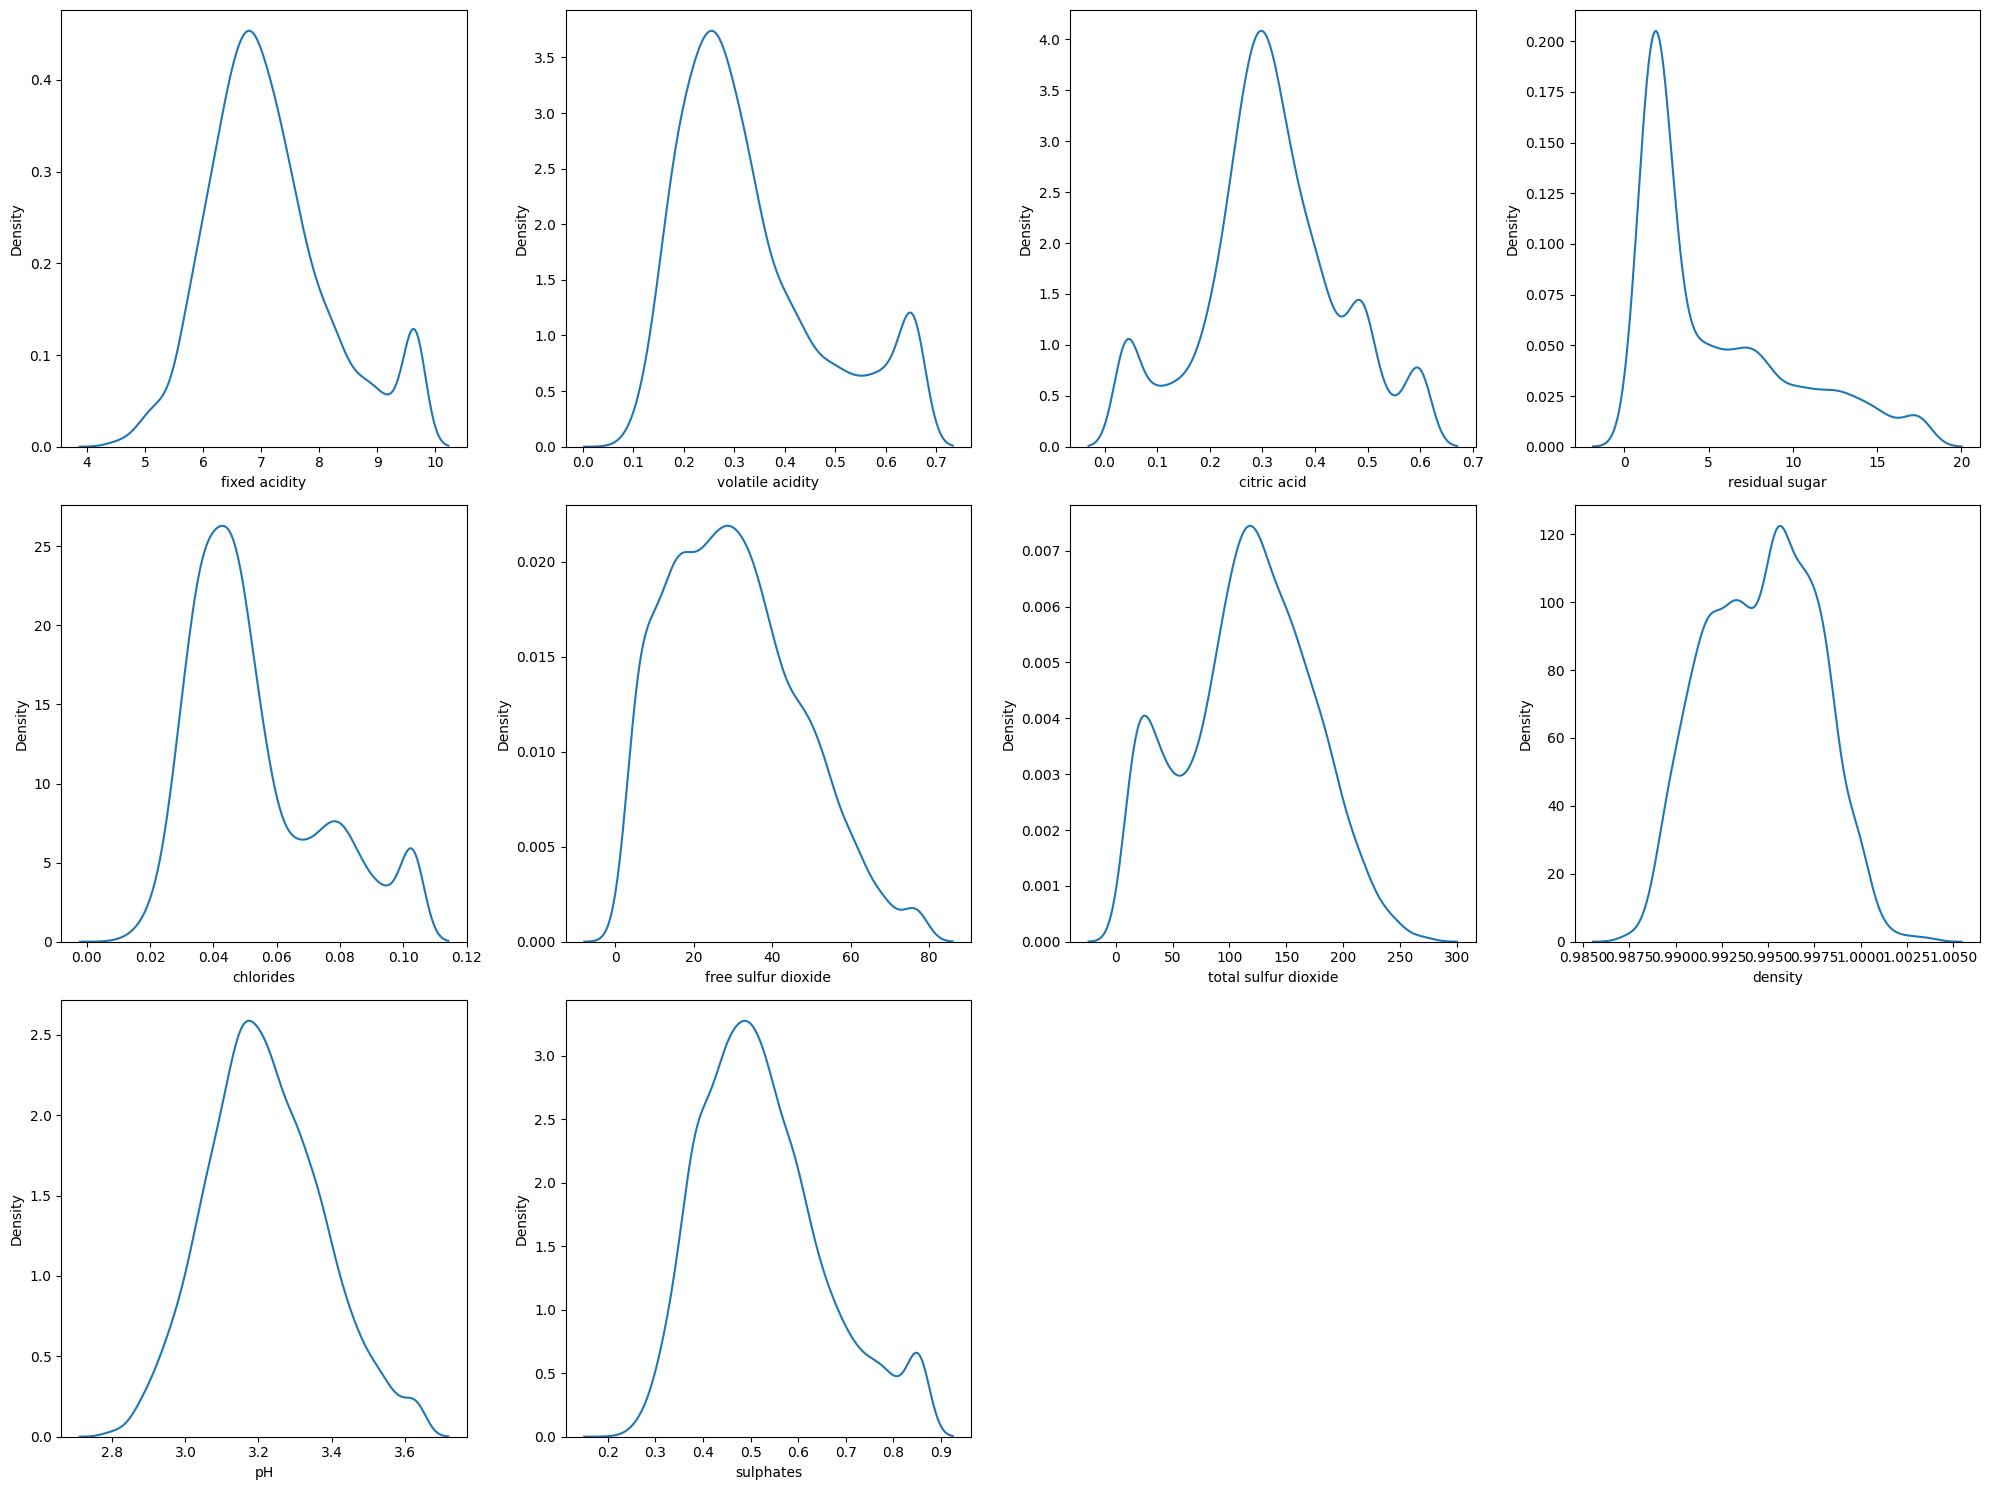

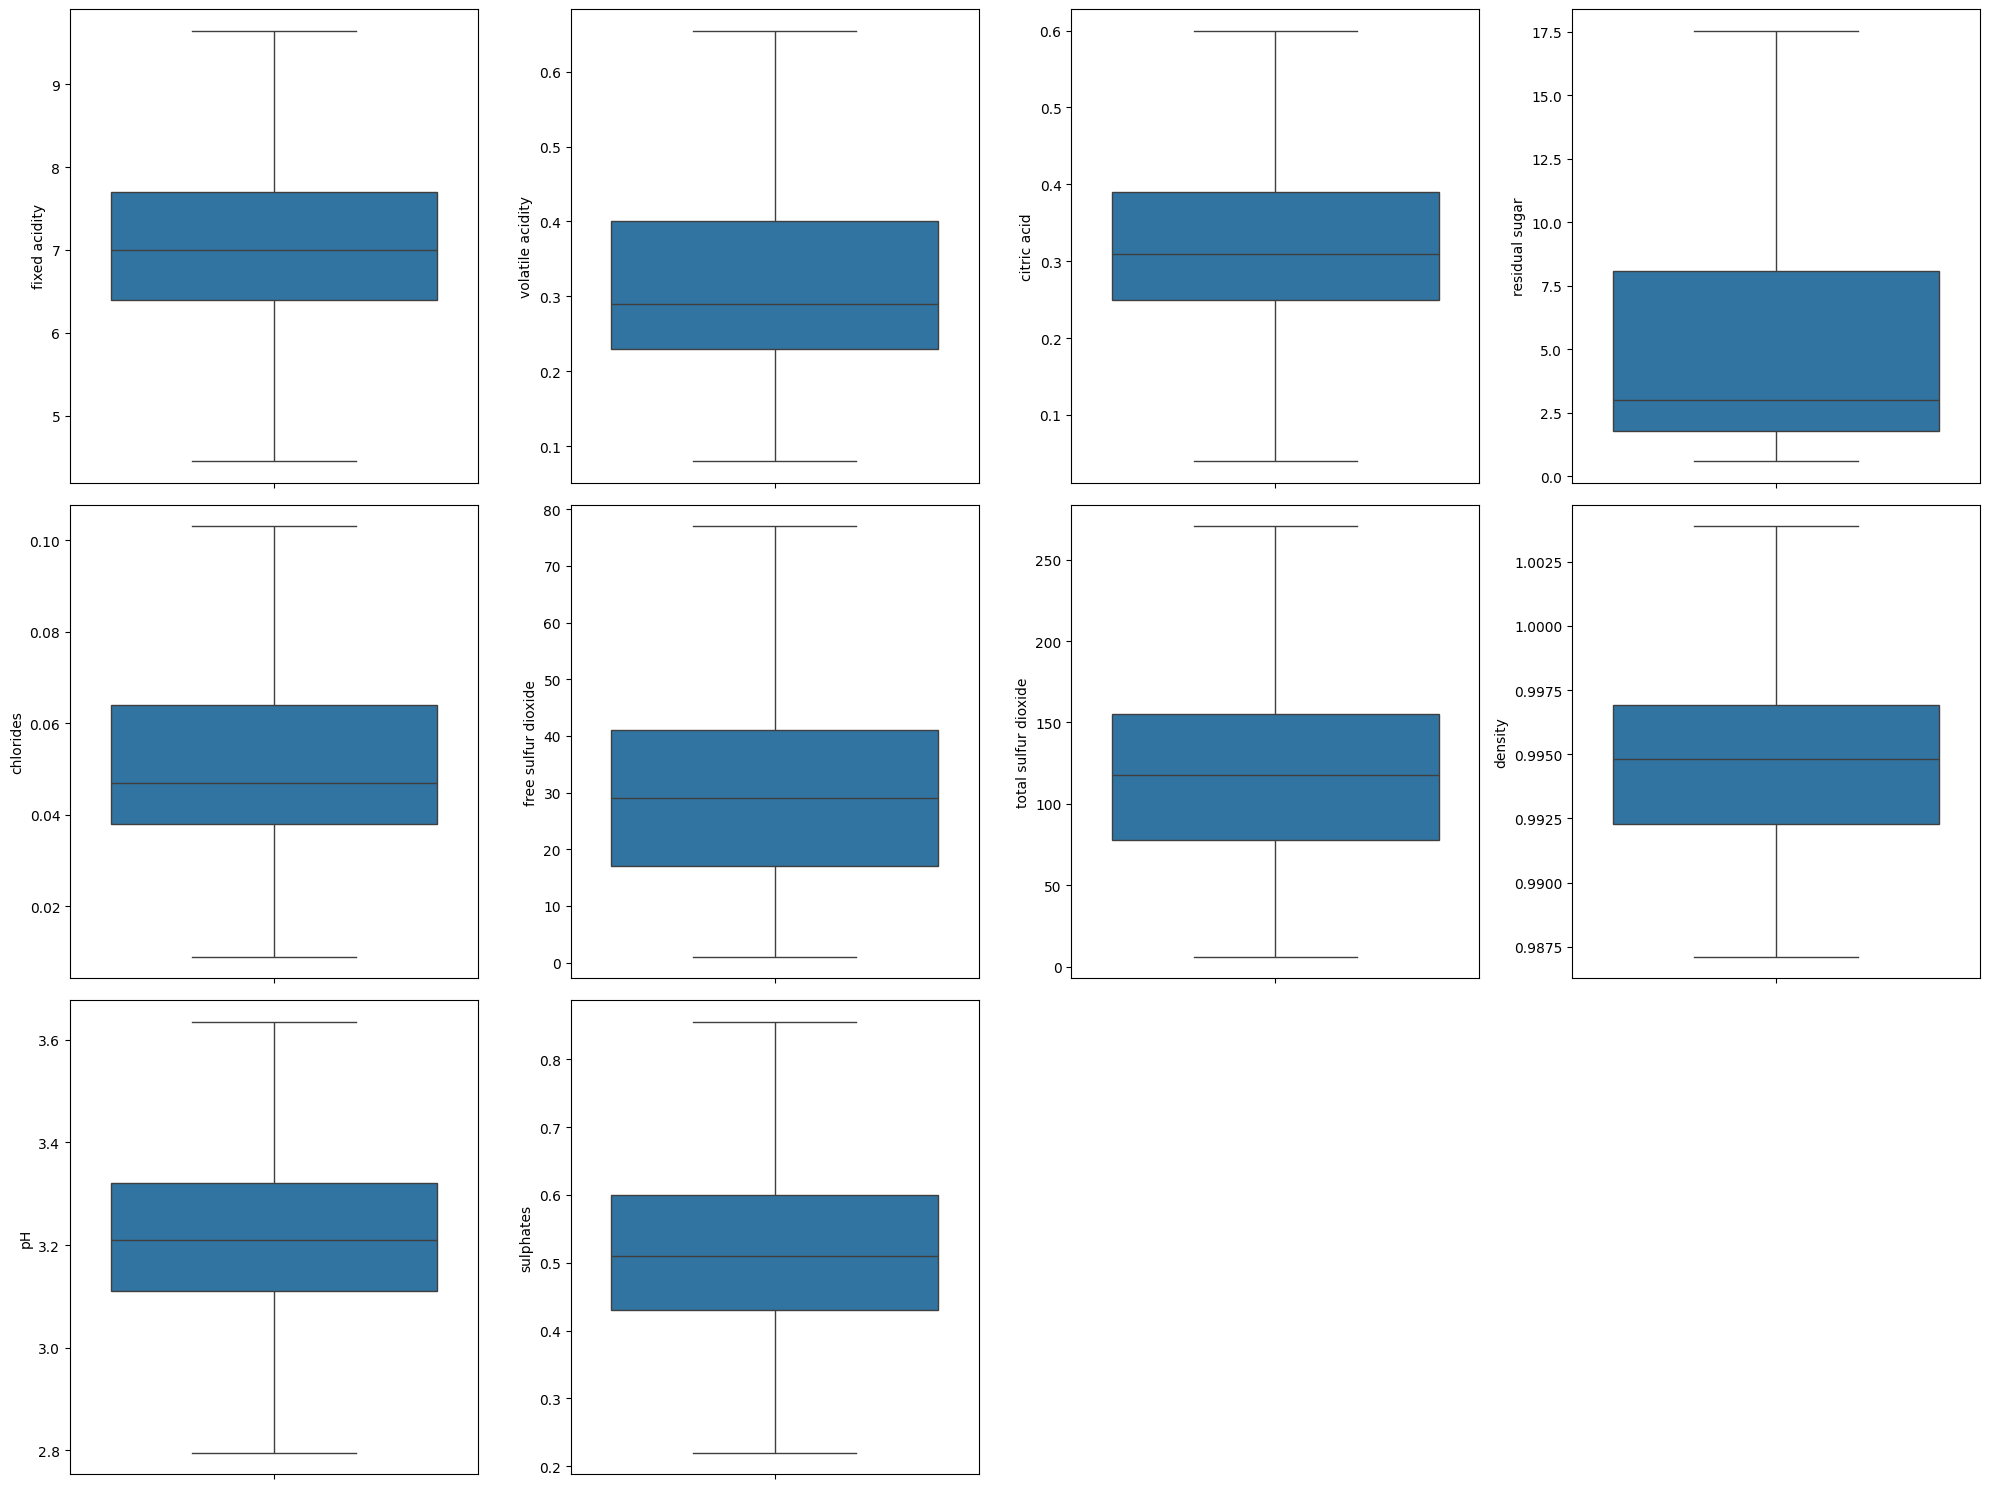

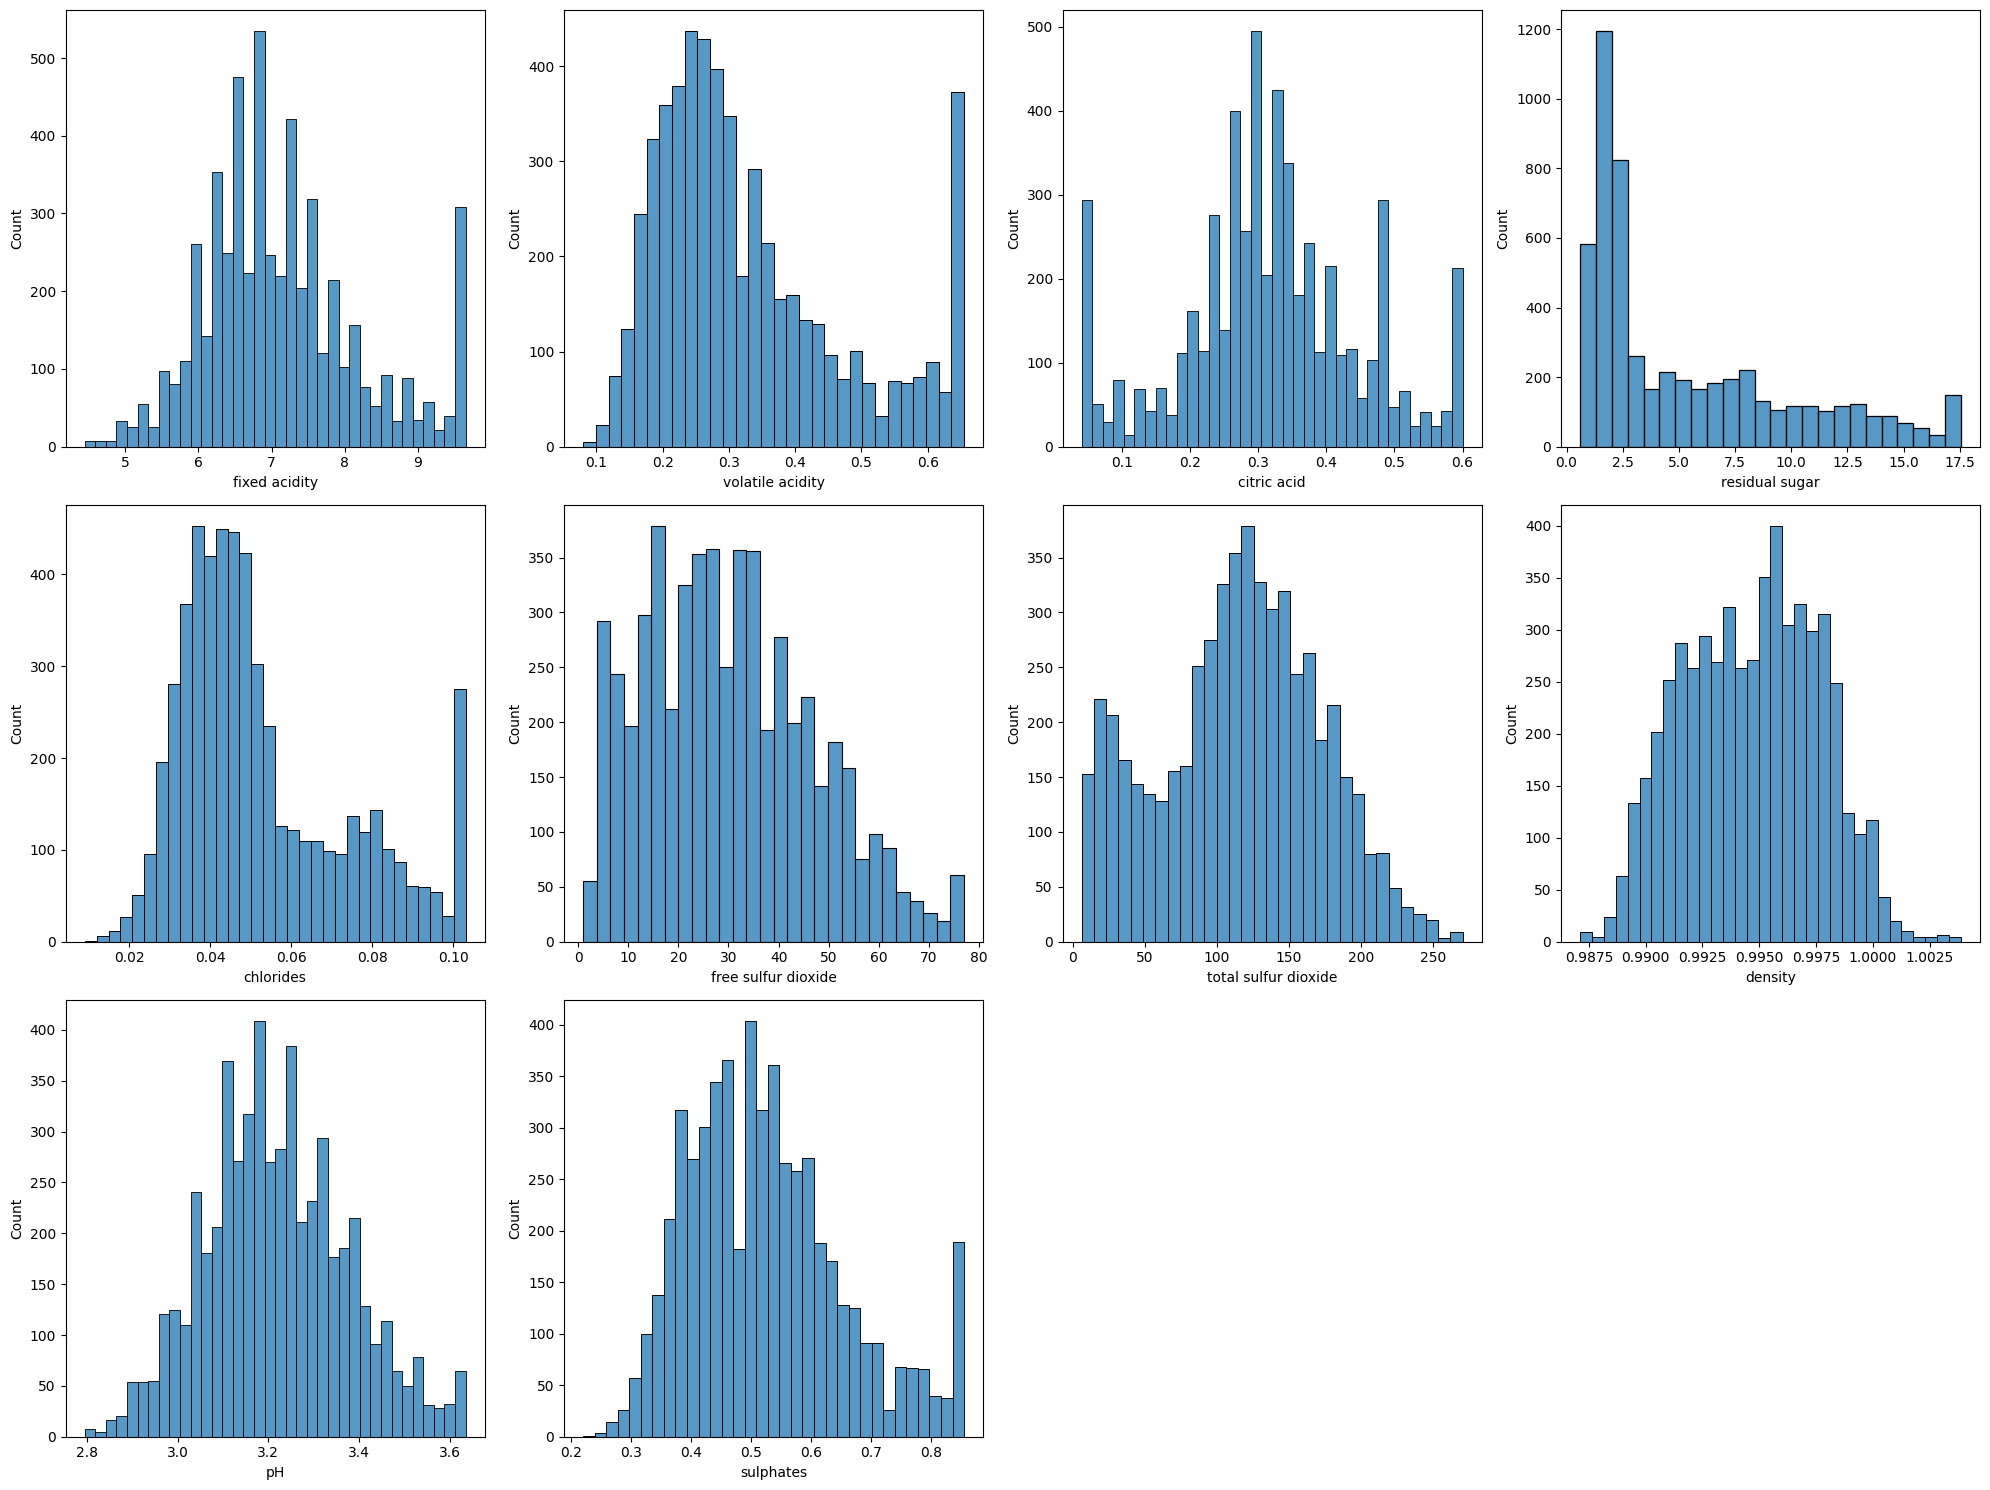

In [106]:
# 이상치 처리 후 데이터 시각화를 진행하시오
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i in range(2,12):
   sns.kdeplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i in range(2,12):
   sns.boxplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for i in range(2,12):
   sns.histplot(train.iloc[:, i], ax=axes[i-2])   
   
for i in range(10, 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Q : train 데이터에서 사용하지 않을 index 열은?

### A : residual sugar 의 데이터의 분포가 치우쳐있기때문에 제거할 수 있다.

In [107]:
train = train.drop('residual sugar', axis=1)

In [108]:
# train-split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=train.drop('type', axis=1)
y=train['type']

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=24)
print(X_train.shape)
print(y_train.shape)

(4397, 12)
(4397,)


## 모델링 진행

## 추후 비교를 위해 데이터프레임 생성

In [109]:
compare = pd.DataFrame(columns=["model", "before tuning", "after tuning"])

#### 의사결정트리(Decision Tree)

In [110]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer

dt_clf = DecisionTreeClassifier(random_state = 24)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
before_tuning = accuracy_score(y_test,pred)
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Accuracy score of model : 0.9755
F1 score of model : 0.9681


In [113]:
# 의사결정트리 파라미터 튜닝 - 범위를 좁혀가며 최적의 파라미터를 찾아보세요
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth': np.arange(1,10),
          'min_samples_split': np.arange(3,10)}
grid_cv =  GridSearchCV(DecisionTreeClassifier(random_state=24), params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)
dt_parm = grid_cv.best_params_
rows_to_add_dt =  {"model": "Decision Tree", "before tuning": before_tuning, "after tuning": format(grid_cv.best_score_)}
print("GridSearchCV highest  mean accuracy value : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

GridSearchCV highest  mean accuracy value : 0.9843
GridSearchCV best hyperparameter : {'max_depth': 6, 'min_samples_split': 5}


In [114]:
rows_to_add_dt

{'model': 'Decision Tree',
 'before tuning': 0.9754545454545455,
 'after tuning': '0.9843065466956251'}

#### 랜덤 포레스트(Random Forest)

In [ ]:
# RandomForest parameter 구성
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=24)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
before_tuning_rf = accuracy_score(y_test,pred)
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

In [ ]:
params={'max_depth': np.arange(3, 10),  
        'min_samples_leaf': np.arange(1, 5),  
        'min_samples_split': np.arange(2, 10)  
        }
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=24), params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)
rf_parm = grid_cv.best_params_
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터',grid_cv.best_params_)
print("f1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

In [ ]:
# RandomForest parameter 튜닝 후 값 사용
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(**rf_parm, random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
rows_to_add_rf =  {"model": "Random forest", "before tuning": before_tuning_rf, "after tuning": accuracy_score(y_test,pred)}
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

In [ ]:
rows_to_add_rf

#### KNN 알고리즘

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
before_tuning_knn = accuracy_score(y_test,knn_pred)
print("{0}NN Score :{1:.4f}".format(5, accuracy_score(y_test, knn_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,knn_pred,average='macro')))

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(3,10),
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
         }
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)
knn_parm = grid_cv.best_params_
rows_to_add_knn =  {"model": "KNN", "before tuning": before_tuning_knn, "after tuning": grid_cv.best_score_}
print("GridSearchCV hightest mean accuracy value : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

In [ ]:
rows_to_add_knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**knn_parm)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("{0}NN Score :{1:.4f}".format(2, accuracy_score(y_test, knn_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,knn_pred,average='macro')))

#### 서포트 벡터 머신 알고리즘(SVN)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(random_state=24)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
before_tuning_svm = accuracy_score(y_test, svm_pred)
print("SVM Score :{0:.4f}".format(accuracy_score(y_test, svm_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,svm_pred,average='macro')))

In [ ]:
svm_clf = SVC(random_state=24) # 튜닝할 모형
params = {'C': [0.1, 1, 10],  
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # 커널의 종류
          } 
grid_cv = GridSearchCV(svm_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)
svm_parm = grid_cv.best_params_
rows_to_add_svm =  {"model": "SVM", "before tuning": before_tuning_svm, "after tuning": grid_cv.best_score_}

print("GridSearchCV highest mean accuracy value : {}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

In [ ]:
rows_to_add_svm

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(**svm_parm)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print("SVM Score :{0:.4f}".format(accuracy_score(y_test, svm_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,svm_pred,average='macro')))

#### 로지스틱 회귀

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=24)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print("Logistic Score :{0:.4f}".format(accuracy_score(y_test,lr_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,lr_pred,average='macro')))

#### Soft Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(**dt_parm)
lr_clf = LogisticRegression(random_state=24)
rf_clf = RandomForestClassifier(**rf_parm)
knn_clf = KNeighborsClassifier(**knn_parm)
svm_clf = SVC(**svm_parm, probability=True) 

voting_clf = VotingClassifier(
    estimators=[('dt', dt_clf), ('lr', lr_clf), ('rf', rf_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

In [ ]:
# Soft Voting Result
pred=voting_clf.predict(X_test)
print("Voting Accuracy Score :{0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

### 결론

In [115]:
compare_list = [rows_to_add_dt, rows_to_add_rf, rows_to_add_knn, rows_to_add_svm]


In [116]:
compare = pd.DataFrame(compare_list)

In [117]:
compare

,model,before tuning,after tuning
0,Decision Tree,0.975455,0.9843065466956251
1,Random forest,0.990909,0.991818
2,KNN,0.898182,0.922445
3,SVM,0.739091,0.979988


## 튜닝 전과 후 모두 RandomForest의 성능이 가장 좋았다.

> 튜닝을 통해 RandomForest의 성능이 약간 향상됐다.

> SVM 모델은 튜닝을 통해 성능이 많이 향상됐지만, 튜닝 후에도 RandomForest의 성능보다는 떨어졌다.

> 해당 train 데이터는 RandomForest 모델을 통해 예측하는 것이 타당하다.